In [1]:
import os
from PIL import Image

def get_image_pils(directory_path):
    image_pils = []
    image_extensions = ['.jpg', '.jpeg', '.png']
    for root, _, files in os.walk(directory_path):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                file_path = os.path.join(root, file)
                try:
                    image = Image.open(file_path)
                    image_pils.append(image)
                except Exception as e:
                    print(f"error processing {file_path}: {str(e)}")
    return image_pils

327
<class 'PIL.JpegImagePlugin.JpegImageFile'>


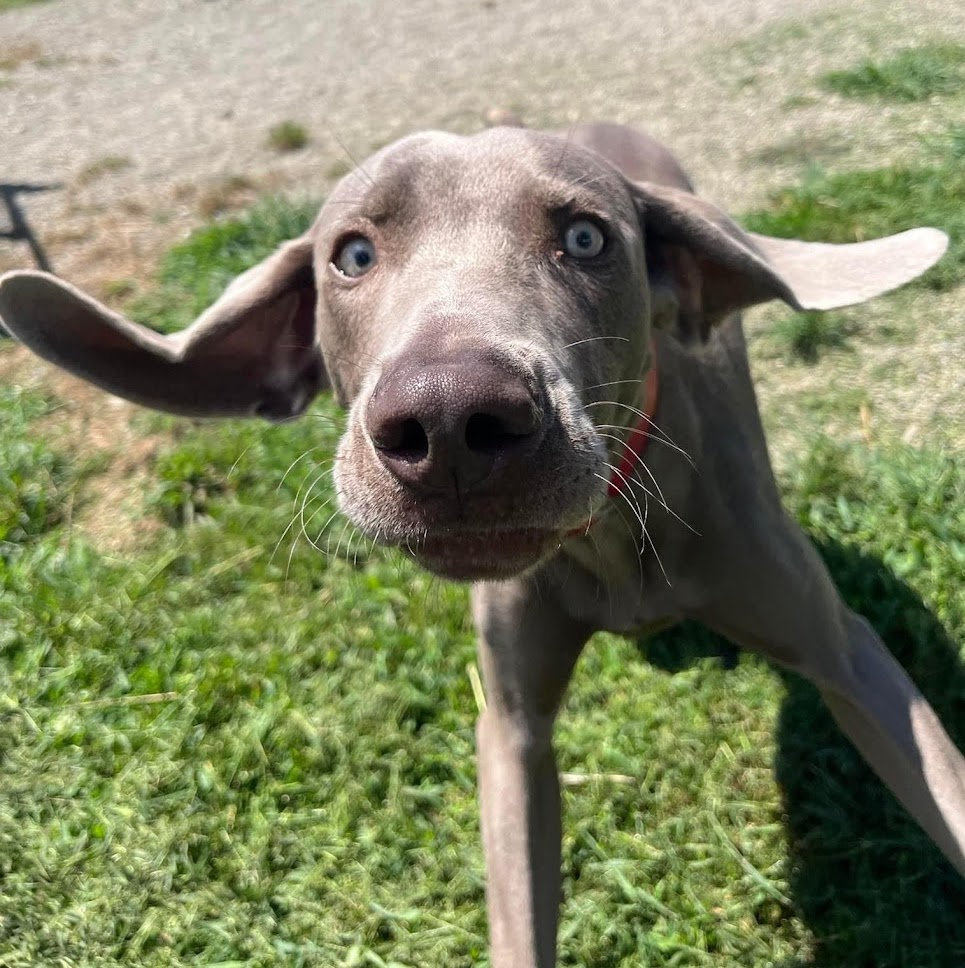

In [2]:
import IPython
image_pils = get_image_pils('/root/autodl-tmp/benchmark/instance')
print(len(image_pils))
print(type(image_pils[0]))
display(image_pils[100])

In [3]:
import torch
model = torch.hub.load(source='local', 
                       repo_or_dir='/root/.cache/torch/hub/ultralytics_yolov5_master', 
                       model = 'yolov5s', 
                       pretrained = True)

YOLOv5 🚀 2023-8-18 Python-3.9.17 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
results = model(image_pils[::5])